In [6]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

start = "2018-03-01"
end = "2023-03-01"

symbol = "005930.KS"

In [7]:
samsung = yf.download(symbol,start,end)

[*********************100%***********************]  1 of 1 completed


In [8]:
print(samsung)

               Open     High      Low    Close     Adj Close    Volume
Date                                                                  
2018-03-02  46580.0  46800.0  46000.0  46020.0  39682.730469  13265500
2018-03-05  45820.0  46160.0  45080.0  45200.0  38975.656250  14100950
2018-03-06  45920.0  47100.0  45820.0  47020.0  40545.027344  15423350
2018-03-07  48200.0  48900.0  47220.0  48620.0  41924.695312  21427050
2018-03-08  49200.0  49480.0  48080.0  49200.0  42424.828125  19463650
...             ...      ...      ...      ...           ...       ...
2023-02-22  61500.0  61800.0  61000.0  61100.0  61100.000000     39178
2023-02-23  61700.0  62500.0  61500.0  62000.0  62000.000000     37145
2023-02-24  62300.0  62600.0  61300.0  61300.0  61300.000000     50792
2023-02-27  60800.0  60800.0  60200.0  60500.0  60500.000000  11155697
2023-02-28  60800.0  61400.0  60500.0  60600.0  60600.000000  13715861

[1230 rows x 6 columns]


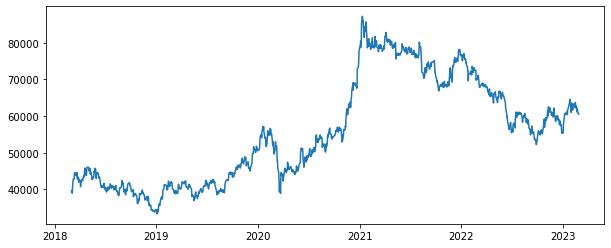

In [10]:
plt.figure(figsize=(10,4))
plt.plot(samsung['Adj Close'])

In [20]:
from backtesting import Backtest, Strategy
from backtesting.lib import crossover
from backtesting.test import SMA, GOOG

class SmaCross(Strategy):
	def init(self):
		price = self.data.Close
		self.ma1 = self.I(SMA, price, 5)
		self.ma2 = self.I(SMA, price, 20)
	def next(self):
		if crossover(self.ma1, self.ma2):
			self.buy()
		elif crossover(self.ma2, self.ma1):
			self.position.close()

bt = Backtest(samsung, SmaCross, commission=0.0, exclusive_orders=True)
stats = bt.run()

bt.plot()

print(stats)
print(stats['_trades'])

C:\Users\ahn\AppData\Local\Temp/ipykernel_20320/600431513.py:16: UserWarning: Some prices are larger than initial cash value. Note that fractional trading is not supported. If you want to trade Bitcoin, increase initial cash, or trade μBTC or satoshis instead (GH-134).
  bt = Backtest(samsung, SmaCross, commission=0.0, exclusive_orders=True)


Start                     2018-03-02 00:00:00
End                       2023-02-28 00:00:00
Duration                   1824 days 00:00:00
Exposure Time [%]                         0.0
Equity Final [$]                      10000.0
Equity Peak [$]                       10000.0
Return [%]                                0.0
Buy & Hold Return [%]               31.681877
Return (Ann.) [%]                         0.0
Volatility (Ann.) [%]                     0.0
Sharpe Ratio                              NaN
Sortino Ratio                             NaN
Calmar Ratio                              NaN
Max. Drawdown [%]                        -0.0
Avg. Drawdown [%]                         NaN
Max. Drawdown Duration                    NaN
Avg. Drawdown Duration                    NaN
# Trades                                    0
Win Rate [%]                              NaN
Best Trade [%]                            NaN
Worst Trade [%]                           NaN
Avg. Trade [%]                    